In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as rq
import re
import datetime
import os
import time

import plotly.offline as pyo 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-081114.xlsx'
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-084343.xlsx'
stock_excel_filepath = '../Output/RawReports-05-ScrapeSummerizeStockSet/SummaryReport-20240906-084944.xlsx'

In [3]:
xls = pd.ExcelFile(stock_excel_filepath)

df_basic_info               = pd.read_excel(xls, "Basic Info") # Top Ratios
df_top_ratios               = pd.read_excel(xls, "Top Ratios") # Top Ratios
df_quaterly_results         = pd.read_excel(xls, "Quarterly Results") # Quarterly Results
df_profit_n_loss            = pd.read_excel(xls, "Profit & Loss") # Profit & Loss
df_compounded_sales_growth  = pd.read_excel(xls, "Compounded Sales Growth") # Compounded Sales Growth
df_compounded_profit_growth = pd.read_excel(xls, "Compounded Profit Growth") # Compounded Profit Growth
df_stock_price_cagr         = pd.read_excel(xls, "Stock Price CAGR") # Stock Price CAGR
df_return_on_equity         = pd.read_excel(xls, "Return on Equity") # Return on Equity
df_balance_sheet            = pd.read_excel(xls, "Balance Sheet") # Balance Sheet
df_cash_flows               = pd.read_excel(xls, "Cash Flows") # Cash Flows
df_ratios                   = pd.read_excel(xls, "Ratios") # Ratios
df_shareholding_pattern     = pd.read_excel(xls, "Shareholding Pattern") # Shareholding Pattern

In [17]:
df_profit_n_loss

,Profit and Loss,Stockname,Mar 2013,Mar 2014,Mar 2015,Mar 2016,Mar 2017,Mar 2018,Mar 2019,Mar 2020,Mar 2021,Mar 2022,Mar 2023,Mar 2024,TTM
0,Revenue,HDFCBANK,35065.00,41136.00,48470.00,60221.00,69306.00,80241.00,98972.00,114813.0,120858.00,127753.00,161586.00,258341.00,282787.00
1,Interest,HDFCBANK,19254.00,22653.00,26074.00,32630.00,36167.00,40146.00,50729.00,58626.0,55979.00,55744.00,74743.00,149808.00,168016.00
2,Expenses,HDFCBANK,12261.00,12959.00,15407.00,18999.00,22464.00,27712.00,32529.00,41644.0,47123.00,50904.00,57329.00,84068.00,89184.00
3,Financing Profit,HDFCBANK,3550.00,5524.00,6989.00,8592.00,10676.00,12383.00,15714.00,14542.0,17757.00,21105.00,29513.00,24464.00,25587.00
4,Financing Margin %,HDFCBANK,10.00,13.00,14.00,14.00,15.00,15.00,16.00,13.0,15.00,17.00,18.00,9.00,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Profit before tax,PNB,6522.00,4691.00,3957.00,-5738.00,2012.00,-19575.00,-15346.00,739.0,3479.00,4316.00,4288.00,13194.00,16460.00
92,Tax %,PNB,27.00,29.00,23.00,-31.00,34.00,-37.00,-35.00,55.0,42.00,20.00,42.00,38.00,NaN
93,Net Profit,PNB,4748.00,3343.00,3062.00,-3974.00,1325.00,-12283.00,-9975.00,336.0,2022.00,3457.00,2507.00,8245.00,10241.00
94,EPS in Rs,PNB,26.86,18.46,16.51,-20.24,6.23,-44.49,-21.67,0.5,1.93,3.14,2.28,7.49,9.29


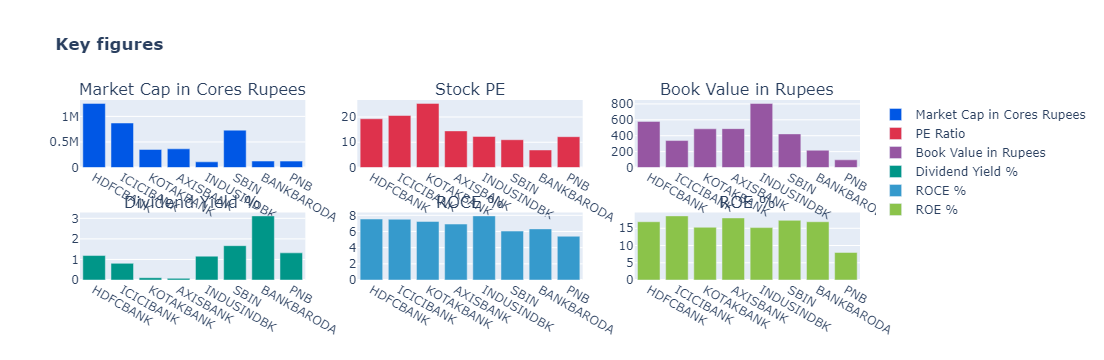

In [16]:
color_set = {
        "dark_red"       : "#6f1926",
        "red"            : "#de324c",
        "orange"         : "#f4895f",
        "yellow"         : "#f8e16f",
        "bright_green"   : "#8bc34a",
        "dark_green"     : "#009688", #"#318a01",
        "blue"           : "#369acc",
        "sky_blue"       : "#80d9ff",
        "dark_blue"      : "#0057e5",
        "violet"         : "#9656a2",
        "purple"         : "#7b4fff",
        "black"          : "#212020",
        "gray"           : "#777675"
    }

## Charting
fig = go.Figure()

x  = df_top_ratios['Stockname']
y1 = df_top_ratios['Market Cap in Cores Rupees']
y2 = df_top_ratios['Stock PE']
y3 = df_top_ratios['Book Value in Rupees']
y4 = df_top_ratios['Dividend Yield %']
y5 = df_top_ratios['ROCE %']
y6 = df_top_ratios['ROE %']


fig = make_subplots(
        rows=2,
        cols=3,
        specs=[
            [{"type": "bar"}, {"type": "bar"},{"type": "bar"}],
            [{"type": "bar"}, {"type": "bar"},{"type": "bar"}],
        ],
       subplot_titles=('Market Cap in Cores Rupees', 'Stock PE', 
                       'Book Value in Rupees', 'Dividend Yield %', 'ROCE %', 'ROE %')
    )


fig.add_trace( go.Bar(x=x, y=y1, name='Market Cap in Cores Rupees', marker_color =color_set.get("dark_blue")), row=1, col=1)
fig.add_trace( go.Bar(x=x, y=y2, name='PE Ratio', marker_color =color_set.get("red")), row=1, col=2)
fig.add_trace( go.Bar(x=x, y=y3, name='Book Value in Rupees', marker_color =color_set.get("violet")), row=1, col=3)
fig.add_trace( go.Bar(x=x, y=y4, name='Dividend Yield %', marker_color =color_set.get("dark_green")), row=2, col=1)
fig.add_trace( go.Bar(x=x, y=y5, name='ROCE %', marker_color =color_set.get("blue")), row=2, col=2)
fig.add_trace( go.Bar(x=x, y=y6, name='ROE %', marker_color =color_set.get("bright_green")), row=2, col=3)


 
plot_title = '<b>Key figures</b>'

fig.update_layout(title=plot_title)

pyo.plot(fig, filename="key-figures.html")
fig.show()



In [ ]:
fig = go.Figure()

x  = df_top_ratios['Stockname']
y1 = df_top_ratios['Market Cap in Cores Rupees']
y2 = df_top_ratios['Stock PE']

fig.add_trace(go.Bar(x=x, y=y1, name='Market Cap', marker_color ="#2205a3"))

plot_title = '<b>Market Cap</b>'


fig.update_layout(title=plot_title,xaxis_title='Maret Cap',yaxis_title=' Rs. Cr ')


fig.show()
